In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 9 – Functions and Apply

## DSC 10, Spring 2022

### Announcements

- Lab 3 is due **tomorrow at 11:59pm**.
- Homework 3 is due **Saturday 7/23 at 11:59pm**.

### Agenda

- Functions.
- `.apply`.
- Example: predicting heights.

**Reminder:** don't forget to refer to the [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)‼️

## Functions

### Defining functions
* We've learned how to do quite a bit in Python:
    * Manipulate arrays, Series, and DataFrames.
    * Perform operations on strings.
    * Create visualizations.
* But so far, we've been restricted to using existing functions (e.g. `max`, `np.sqrt`, `len`) and methods (e.g. `groupby`, `assign`, `strip`). 

In [2]:
# let's find the spread (max - min)
nums1 = np.array([20, 42, 99, 121])
nums2 = np.array([0, 5, 10, 2])
nums3 = np.arange(10, 30, 3)

In [3]:
max(nums1) - min(nums1)

101

In [4]:
max(nums2) - min(nums2)

10

In [5]:
max(nums3) - min(nums3)

18

In [6]:
def spread(values):
    '''Returns the difference between the largest and smallest value in values.'''
    return max(values) - min(values)

In [7]:
spread([20, 42, 99, 121])

101

### Functions

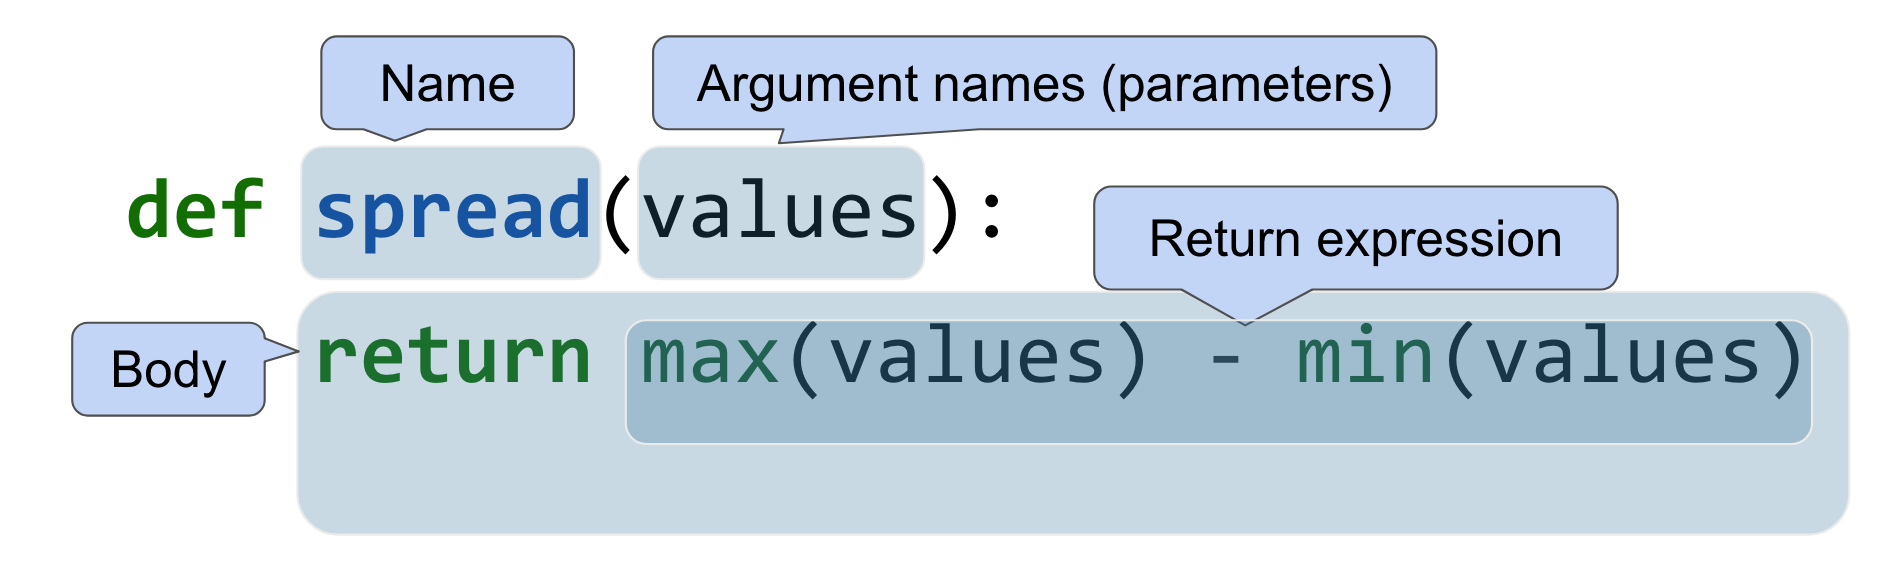

In [8]:
# You can name your functions whatever you want – but choose meaningful names.
def whats_up(doc):
    return max(doc) - min(doc)

In [9]:
whats_up([20, 42, 99, 121])

101

### `def` statements define functions

- User-defined functions give names to blocks of code. 
- Think of functions as "recipes" – a function takes in inputs (arguments), does something, and produces an output.

A few **key facts** about functions:
1. Variables defined in functions only exist inside the function.
2. The inputs (arguments) of a function can be of any type.
3. The body of a function is not run until you use (call) the function.

In [10]:
def what_is_awesome(s):
    '''Returns what's awesome.'''
    return s + ' is awesome!'

In [11]:
# Call the function!


**Fact 1**: variable names inside the function only exist inside the function (unless you repeat that variable name outside of the function, as well).

In [12]:
s

NameError: name 's' is not defined

### Arguments are placeholders

In [13]:
def triple(x):
    return x * 3

When we call `triple(-15)`, you can pretend that there's an invisible line in the body of `triple` that says `x = -15`.

In [14]:
triple(15)

45

**Fact 2**: the arguments of a function can be of any type. `triple(15)` and `triple('yeah')` both work, even though `15` is a number and `'yeah'` is a string.

In [15]:
triple('yeah')

'yeahyeahyeah'

### Functions don't run until you call them! 😴

In [16]:
def where_is_the_error(something):
    '''Illustrates that errors don't occur until functions are executed (called).'''
    return (1 / 0) + something

**Fact 3**: the body of a function is not run until you use (call) the function.
- We can define `where_is_the_error` without seeing an error message. 
- It is only when we **call** `where_is_the_error` that Python gives us an error message.

In [17]:
where_is_the_error(5)

ZeroDivisionError: division by zero

### Multiple arguments

Functions can have any number of arguments.

In [18]:
# Example function with 2 arguments
def greeting(your_name, my_name):
    return 'Hello ' + your_name + ', my name is '+ my_name

In [19]:
greeting('Kanga', 'Roo')

'Hello Kanga, my name is Roo'

In [20]:
greeting('Queen', 'Triton')

'Hello Queen, my name is Triton'

In [21]:
# Example function with no arguments
def other_greeting():
    return 'Hi! 👋'

In [22]:
other_greeting()

'Hi! 👋'

### Example: first name

Let's create a function called `first_name` that takes in someone's full name and returns their first name. Example behavior is shown below.
```py
>>> first_name('Barack Obama')
'Barack'
```
- _**Hint:**_ Use the string method `.split()`.

General strategy for writing functions: 
1. First, try and get the behavior to work on a single example. 
2. Then, encapsulate that behavior inside a function.

In [23]:
# Let's try an example first.
'Barack Obama'.split(' ')[0]

'Barack'

In [24]:
def first_name(full_name):
    '''Returns the first name given a full name.'''
    return full_name.split(' ')[0]

In [25]:
first_name('Barack Obama')

'Barack'

In [26]:
# What if they have two last names or a middle name?
first_name('Ruth Bader Ginsburg')

'Ruth'

### Returning

- The `return` keyword specifies what the output of your function should be, i.e. what a call to your function will evaluate to.
- Most functions we write will use `return`, but using `return` is not required.
- Be careful: `print` and `return` work differently!

In [27]:
def pythagorean(a, b):
    '''Computes the hypotenuse length of a triangle with legs a and b.'''
    c = (a**2 + b**2)**0.5
    print(c)

In [28]:
x = pythagorean(3, 4)

5.0


In [29]:
# No output – why?
x

In [30]:
# Errors – why?
x + 10

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [31]:
def pythagorean(a, b):
    '''Computes the hypotenuse length of a triangle with legs a and b.'''
    c = (a**2 + b**2)**0.5
    return c

In [32]:
x = pythagorean(3, 4)
x

5.0

In [33]:
x + 10

15.0

## Applying functions to DataFrames

### Example: Common first names

- What is the most common first name among NBA players?

In [34]:
nba = bpd.read_csv('data/nba-2022.csv')
nba

,Player,Position,Team,Salary
0,John Collins,PF,Atlanta Hawks,23000000
1,Danilo Gallinari,PF,Atlanta Hawks,20475000
2,Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...,...
378,Raul Neto,PG,Washington Wizards,2089448
379,Daniel Gafford,C,Washington Wizards,1782621
380,Anthony Gill,PF,Washington Wizards,1517981


- **Problem**: We can't answer that right now, since we don't have a column for first names.
- **Solution**: use our function that extracts first names on _every_ element of the `'Player'` column.

### Using our `first_name` function

- We can use our `first_name` function here.
- We somehow need to call it for every player.

In [35]:
nba.get('Player').iloc[0]

'John Collins'

In [36]:
first_name(nba.get('Player').iloc[0])

'John'

In [37]:
first_name(nba.get('Player').iloc[166])

'LeBron'

Ideally, there's a better solution than writing `first_name(nba.get('Player').iloc[...])` 381 times...

### `.apply`

- To **apply** a function to every element of column `column_name` in DataFrame `df`, use:
```
df.get(column_name).apply(function_name)
```
- The `.apply` method **returns a Series**.
    - **Important:** We use `.apply` on Series', **not** DataFrames.
- Pass _just the name_ of the function – don't call it!
    - Good ✅: `.apply(first_name)`.
    - Bad ❌: `.apply(first_name())`.

In [38]:
%%pt

nba.get('Player').apply(first_name)

### Example: Common first names

In [39]:
%%pt

with_first_names = nba.assign(
    First=nba.get('Player').apply(first_name)
)

Now that we have a column containing the first name of each player, we can `groupby` that column.

In [40]:
with_first_names.groupby('First').count().sort_values('Player', ascending=False)

,Player,Position,Team,Salary
First,,,,
Josh,7,7,7,7
Jalen,5,5,5,5
Kevin,5,5,5,5
...,...,...,...,...
JaVale,1,1,1,1
Jaden,1,1,1,1
Ziaire,1,1,1,1


Learn more about [The Jalen Generation](https://www.espn.com/nba/story/_/id/31309206/the-jalen-generation-how-jalen-rose-name-spread-world-sports).

### Note: `.apply` works with built-in functions, too!

In [41]:
# Converts player salaries to a log scale
nba.get('Salary').apply(np.log)

0      16.95
1      16.83
2      16.71
       ...  
378    14.55
379    14.39
380    14.23
Name: Salary, Length: 381, dtype: float64

<div class="menti">
<div>
    
### Discussion Question

How do we find the length of the name of each basketball player in `nba`?

Option|Answer
---|---
A|`nba.get('Player').apply(len(s))`
B|`nba.get('Player').apply(len)`
C|`nba.apply(len, 'Player')`
D|`nba.apply('Player', len)`

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>

In [42]:
# Don't run any code until after you answer the question! 
nba

,Player,Position,Team,Salary
0,John Collins,PF,Atlanta Hawks,23000000
1,Danilo Gallinari,PF,Atlanta Hawks,20475000
2,Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...,...
378,Raul Neto,PG,Washington Wizards,2089448
379,Daniel Gafford,C,Washington Wizards,1782621
380,Anthony Gill,PF,Washington Wizards,1517981


### Example: Thresholding

- We have a dataset containing names and ages.
- Many of the people in our dataset are over 100 years old.
- In the US census, everyone over the age of 100 is counted as being 100.
- Let's try and **threshold** the `'Age'` column.

In [43]:
mini_census = bpd.DataFrame().assign(
    Name=['Ahmad', 'Bo', 'Chi', 'David', 'Emily', 'Feng', 'Greta', 'Henry'], 
    Age=[27, 68, 106, 51, 102, 27, 115, 2]
).set_index('Name')
mini_census

,Age
Name,
Ahmad,27
Bo,68
Chi,106
...,...
Feng,27
Greta,115
Henry,2


### Use `apply` to clean data
* Create a function that returns the smallest of `'Age'` and 100.
* Apply it to all people in the census.
* Create a new column with the cleaned data.

In [44]:
def cut_off_at_100(age):
    '''The smaller of x and 100.'''
    return min(age, 100)

In [45]:
cut_off_at_100(106)

100

In [46]:
mini_census.get('Age').apply(cut_off_at_100)

Name
Ahmad     27
Bo        68
Chi      100
        ... 
Feng      27
Greta    100
Henry      2
Name: Age, Length: 8, dtype: int64

In [47]:
mini_census.assign(
    CleanedAge=mini_census.get('Age').apply(cut_off_at_100)
)

,Age,CleanedAge
Name,,
Ahmad,27,27
Bo,68,68
Chi,106,100
...,...,...
Feng,27,27
Greta,115,100
Henry,2,2


### Aside: resetting the index

What if player names were in the index?

In [48]:
by_player = nba.set_index('Player')
by_player

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [49]:
by_player.index.apply(len)

AttributeError: 'Index' object has no attribute 'apply'

### Aside: resetting the index

- Only Series (columns) have the `.apply` method.
- But we can make the index a column with `.reset_index()`:

In [50]:
by_player

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [51]:
%%pt

by_player.reset_index().get('Player').apply(len)

## Example: Predicting heights

### Sir Francis Galton

<center><img src="data/galton_mittens.jpg" width=300></center>

* 1822 - 1911 (knighted in 1909).
* A pioneer in making predictions.
* Also the founder of eugenics, i.e. the study and practice of breeding offspring with "desirable" characteristics.
    * This is why he collected the data we'll be looking at.
    * Today we understand that eugenics is immoral.
* Coincidentally, he's Charles Darwin's half-cousin.

### Question: Can we predict the height of a child, given the heights of their parents?  👪 📏

In [52]:
# Loading in our dataset
heights = bpd.read_csv('data/galton.csv')
heights = (
    heights.assign(
        midparent=heights.get('midparentHeight'),
        child=heights.get('childHeight')
    )
    .drop(columns=['midparentHeight', 'childHeight', 'family', 'children', 'childNum', 'gender'])
)
heights

,father,mother,midparent,child
0,78.5,67.0,75.43,73.2
1,78.5,67.0,75.43,69.2
2,78.5,67.0,75.43,69.0
...,...,...,...,...
931,62.0,66.0,66.64,61.0
932,62.5,63.0,65.27,66.5
933,62.5,63.0,65.27,57.0


### Recall: Plotting multiple graphs at once
* Drop all extraneous columns from your table.
* Specify the column for the $x$-axis (if not the index) in `.plot(x=column_name)`.
* `plot` will plot **all** other columns on a shared $y$-axis.

Works for `line`, `barh`, `bar`, and `hist`, but not `scatter`.

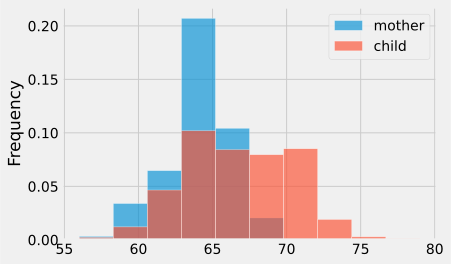

In [53]:
heights.get(['mother', 'child']).plot(kind='hist', density=True, ec='w', alpha=0.65);

### Scatter plot of mother's/father's height vs. child's height

A child's height is influenced by both their mother's height and their father's height.

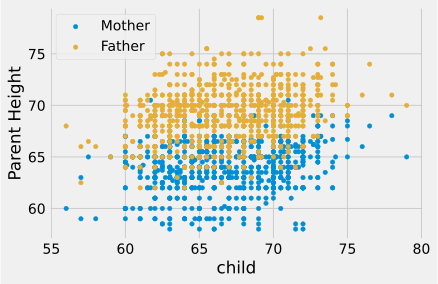

In [54]:
# This plotting code is slightly different;
# don't worry about how it works.
ax = heights.plot(kind='scatter', x='child', y='mother')
ax = heights.plot(kind='scatter', x='child', y='father', ax=ax, color='C2')
plt.ylabel('Parent Height')
plt.legend(['Mother', 'Father']);

### Midparent height

- Galton calculated the variable `midparent` as follows:

$$\text{midparent} = \frac{\text{father's height} + 1.08 \cdot \text{mother's height}}{2}$$


In [55]:
# We don't need to calculate it, since it's already in our DataFrame – this is just for illustration
(heights.get('father') + heights.get('mother') * 1.08) / 2

0      75.43
1      75.43
2      75.43
       ...  
931    66.64
932    65.27
933    65.27
Length: 934, dtype: float64

In [56]:
heights.get('midparent')

0      75.43
1      75.43
2      75.43
       ...  
931    66.64
932    65.27
933    65.27
Name: midparent, Length: 934, dtype: float64

### Scatter plot of child's height vs. midparent height

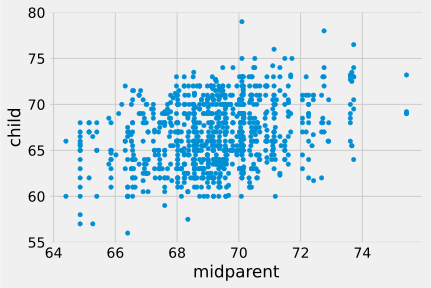

In [57]:
heights.plot(kind='scatter', x='midparent', y='child');

<div class="menti">
<div>
    
### Discussion Question

What would you predict to be the height of a child whose midparent height is 68 inches?

A. 60 inches

B. 65 inches

C. 70 inches

D. 75 inches

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>


### Can we predict the height of a child, given their midparent height?

Yes – here's an approach:

- Look for other children whose midparent height was similar (within 0.5 inches).
- Take the average of the heights of these children.
- Use this average as our guess!

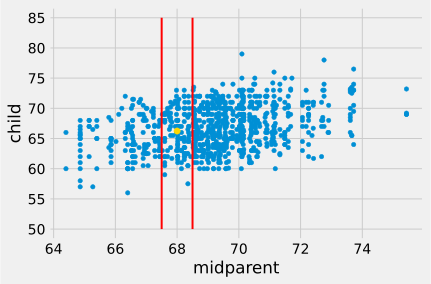

In [58]:
heights.plot(kind='scatter', x='midparent', y='child')

# Don't worry about how the following lines work.
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40);

### Can we predict the height of a child, given their midparent height?

In [59]:
def predict_child(mp):
    '''Returns a child's predicted height, given their midparent height, mp.'''
    relevant_heights = heights[(heights.get('midparent') >= mp - 0.5) & (heights.get('midparent') <= mp + 0.5)]
    return relevant_heights.get('child').mean()
    
predict_child(68)

66.24045801526718

**Note**: This is the first function we've written today that uses a DataFrame inside of it. This is allowed!

### Can we predict the height of a child, given their midparent height?
- Yes! We wrote a function, `predict_child`, that does exactly that.
- To see the predicted height for _every_ child in `heights`, we can apply this function to the `midparent` column.

In [60]:
predictions = heights.get('midparent').apply(predict_child)
predictions

0      70.10
1      70.10
2      70.10
       ...  
931    65.16
932    64.23
933    64.23
Name: midparent, Length: 934, dtype: float64

In [61]:
heights_with_predictions = heights.assign(prediction=predictions)
heights_with_predictions

,father,mother,midparent,child,prediction
0,78.5,67.0,75.43,73.2,70.10
1,78.5,67.0,75.43,69.2,70.10
2,78.5,67.0,75.43,69.0,70.10
...,...,...,...,...,...
931,62.0,66.0,66.64,61.0,65.16
932,62.5,63.0,65.27,66.5,64.23
933,62.5,63.0,65.27,57.0,64.23


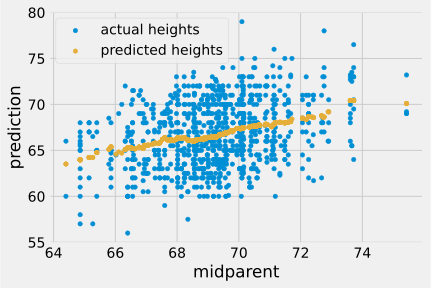

In [62]:
ax = heights_with_predictions.plot(kind='scatter', x='midparent', y='child', label='actual heights')
heights_with_predictions.plot(kind='scatter', x='midparent', y='prediction', ax=ax, color='C2', label='predicted heights');

## Summary

### Summary

- Functions are a way to divide our code into small subparts to prevent us from writing repetitive code.
    - Functions are recipes; they are not run until you use (call) them.
- The `.apply` method allows us to call a function on every single element of a Series, which usually comes from `.get`ting a column of a DataFrame.
- **Next time:** Even more DataFrame manipulation!